# LSTM을 이용하여 텍스트 생성하기

In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
df = pd.read_csv('ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [3]:
# headline에 결측치가 있는지 확인
df['headline'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1324 entries, 0 to 1323
Series name: headline
Non-Null Count  Dtype 
--------------  ----- 
1324 non-null   object
dtypes: object(1)
memory usage: 10.5+ KB


In [4]:
# 헤드라인의 값들을 리스트로 저장
headline = df['headline'].tolist()

In [5]:
# 현재 샘플의 개수 출력
df.shape

(1324, 15)

In [6]:
# Unknown 값을 가진 샘플 제거


# 노이즈 제거 후 샘플의 개수 출력
df = df[~df['headline'].isin(['Unknown'])]

In [7]:
headline = df['headline'].tolist()

In [8]:
# 구두점(!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)불러오는 코드
from string import punctuation
from tqdm import tqdm
# 데이터 전처리 함수
def repreprocessing(raw_sentence):
    # 아스키코드로 디코딩하는 과정에서 아스키 코드로 표현할 수 없는 문자는 사라짐
    preproceseed_sentence = raw_sentence.encode("utf8").decode("ascii",'ignore')
    # 구두점 제거 및 소문자화
    return ''.join(word for word in preproceseed_sentence if word not in punctuation).lower()


# filtered_headline각 요소에 대해 데이터 전처리 과정 수행
dx=[]
for x in tqdm(df['headline']):
    dx.append(repreprocessing(x))



100%|██████████| 1214/1214 [00:00<00:00, 173588.96it/s]


In [9]:
dx

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression',
 'commuter reprogramming',
 'ford changed leaders looking for a lift its still looking',
 'romney failed to win at utah convention but few believe hes doomed',
 'chain reaction',
 'he forced the vatican to investigate sex abuse now hes meeting with pope francis',
 'in berlin artists find a home',
 'the right stuff',
 'jimmy carter knows what north korea wants',
 'the truth is out there',
 'new jersey ruling could reignite battle over churchstate separation',
 'procrastinating',
 'word  quiz dilatory',
 'my lifethreatening bout with e coli food poisoning',
 'choosing brexit a town yearned for its seafaring past and muddied its future',
 'a quote disproved',
 'hot stuff turns cold',
 'at the top the pay gap may be gone',
 'year

In [44]:
dx

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression',
 'commuter reprogramming',
 'ford changed leaders looking for a lift its still looking',
 'romney failed to win at utah convention but few believe hes doomed',
 'chain reaction',
 'he forced the vatican to investigate sex abuse now hes meeting with pope francis',
 'in berlin artists find a home',
 'the right stuff',
 'jimmy carter knows what north korea wants',
 'the truth is out there',
 'new jersey ruling could reignite battle over churchstate separation',
 'procrastinating',
 'word  quiz dilatory',
 'my lifethreatening bout with e coli food poisoning',
 'choosing brexit a town yearned for its seafaring past and muddied its future',
 'a quote disproved',
 'hot stuff turns cold',
 'at the top the pay gap may be gone',
 'year

In [56]:
testtokenizer = Tokenizer()
testtokenizer.fit_on_texts(dx)
testtokenizer.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'for': 6,
 'and': 7,
 'is': 8,
 'on': 9,
 'with': 10,
 'trump': 11,
 'as': 12,
 'at': 13,
 'new': 14,
 'how': 15,
 'from': 16,
 'it': 17,
 'an': 18,
 'that': 19,
 'be': 20,
 'season': 21,
 'us': 22,
 'you': 23,
 'its': 24,
 'what': 25,
 'episode': 26,
 'can': 27,
 'your': 28,
 'not': 29,
 'he': 30,
 'now': 31,
 'his': 32,
 'are': 33,
 'teaching': 34,
 'war': 35,
 'out': 36,
 'no': 37,
 'was': 38,
 'by': 39,
 'trumps': 40,
 'has': 41,
 'over': 42,
 'may': 43,
 'into': 44,
 'why': 45,
 'more': 46,
 'we': 47,
 'who': 48,
 'about': 49,
 'recap': 50,
 'activities': 51,
 '1': 52,
 'just': 53,
 'do': 54,
 'women': 55,
 'when': 56,
 'syria': 57,
 'trade': 58,
 'i': 59,
 '2': 60,
 'or': 61,
 'will': 62,
 'this': 63,
 'have': 64,
 'president': 65,
 'but': 66,
 'home': 67,
 'up': 68,
 'long': 69,
 'one': 70,
 'off': 71,
 'facebook': 72,
 'house': 73,
 'gop': 74,
 'our': 75,
 'case': 76,
 'they': 77,
 'life': 78,
 'end': 79,
 'right': 80,
 'some':

In [60]:
tt = testtokenizer.texts_to_sequences(dx)
tt
seqs=[]
for x  in  tt :
    for i in range(1,len(x)):
        seqs.append(x[:i+1])

In [64]:
max_len = max(len(l) for l in seqs)

In [65]:
seqs = pad_sequences(seqs, maxlen=max_len, padding='pre')

In [66]:
seqs= np.array(seqs)
X=seqs[:,:-1]
y=seqs[:,-1]

In [67]:
X

array([[   0,    0,    0, ...,    0,    0,   99],
       [   0,    0,    0, ...,    0,   99,  269],
       [   0,    0,    0, ...,   99,  269,  371],
       ...,
       [   0,    0,    0, ...,  170,    8, 3493],
       [   0,    0,    0, ...,    8, 3493,  115],
       [   0,    0,    0, ..., 3493,  115,    2]])

In [68]:
y

array([ 269,  371, 1115, ...,  115,    2, 1025])

In [69]:
vocab_size = len(testtokenizer.word_index) + 1
y = to_categorical(y, num_classes=vocab_size)

In [70]:
y.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
# 토큰화 및 단어 집합의 크기(vocab_size) 계산
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenizer 객체 생성
tokenizer = Tokenizer()

# X_train에 존재하는 단어마다 부여될 숫자 계산
tokenizer.fit_on_texts(dx)
tokenizer.texts_to_sequences(dx)
vocab_size = len(tokenizer.word_index) + 1
texts =  dx
# 단어 벡터화

sequences  = list()
for text in texts:

    encoded = tokenizer.texts_to_sequences([text])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
# vocab_size = len(tokenizer.word_index) + 1  # 1을 더해 0 인덱스 확보

# max_sequence_len = max([len(seq) for seq in sequences])  # 가장 긴 시퀀스 길이 계산
# padded_sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='post')


In [86]:
tokenizer.texts_to_sequences([text])

[[170, 8, 3493, 115, 2, 1025]]

In [89]:
sequences

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3],
 [100, 3, 1117],
 [100, 3, 1117, 2],
 [100, 3, 1117, 2, 14],
 [100, 3, 1117, 2, 14, 583],
 [100, 3, 1117, 2, 14, 583, 24],
 [100, 3, 1117, 2, 14, 583, 24, 1118],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373, 374],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373, 374, 5],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373, 374, 5, 1119],
 [1, 14],
 [1, 14, 1120],
 [1, 14, 1120, 1121],
 [15, 2],
 [15, 2, 584],
 [15, 2, 584, 4],
 [15, 2, 584, 4, 215],
 [15, 2, 584, 4, 215, 375],
 [15, 2, 584, 4, 215, 375, 1122],
 [15, 2, 584, 4, 215, 375, 1122, 2],
 [15, 2, 584, 4, 215, 375, 1122, 2, 376],
 [15, 2, 584, 4, 215, 375, 1122, 2, 376, 

In [72]:
max_len = max(len(l) for l in sequences)
print(max_len)

ValueError: max() iterable argument is empty

In [91]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [92]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [93]:
y

array([ 269,  371, 1115, ...,  115,    2, 1025])

In [94]:
y = to_categorical(y, num_classes=vocab_size)

In [118]:
y

(7803, 23)

In [123]:
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, ConvLSTM1D, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백 생성
model_checkpoint=ModelCheckpoint(filepath = 'best1_1.keras', monitor = 'accuracy', save_best_only = True, verbose=1)

# RNN 모델 정의
model = Sequential()
model.add(Embedding(vocab_size, 128))  # 문자 임베딩
model.add(Reshape((1, -1, 128)))
model.add(ConvLSTM1D(64,5, padding='same'))  # LSTM 레이어
model.add(LSTM(vocab_size, activation='softmax',return_sequences=False))
# model.add(Dense(vocab_size, activation='softmax'))/  # 출력 레이어 (softmax)

# 모델 컴파일
model.compile(loss='categoricayl_crossentrop', optimizer='adam', metrics=['accuracy'])

# # 모델 학습
# model.fit(X, y, epochs=80, verbose=1)


In [124]:

model.fit(X, y, epochs=40, callbacks=[model_checkpoint])

Epoch 1/40


: 

ImportError: cannot import name 'saved_model' from 'tensorflow.keras.models' (c:\Users\humming\anaconda3\Lib\site-packages\keras\_tf_keras\keras\models\__init__.py)

In [42]:
model = load_model(filepath='best1_1.keras')
# model.fit(X, y, epochs=80, verbose=1)

NameError: name 'saved_model' is not defined

In [25]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

c:\Users\humming\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 1212
'y' sizes: 3


In [41]:
import numpy as np 
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
maxlen = len([x for x in encoded_text])
encoded_text= sequence.pad_sequences(encoded_text, maxlen=maxlen)

In [46]:
# 문장을 분해하여 sequence 생성
len(encoded_text[0])

69

단어 집합의 크기: 3494
메일의 최대 길이 : 24
메일의 평균 길이 : 7.436469


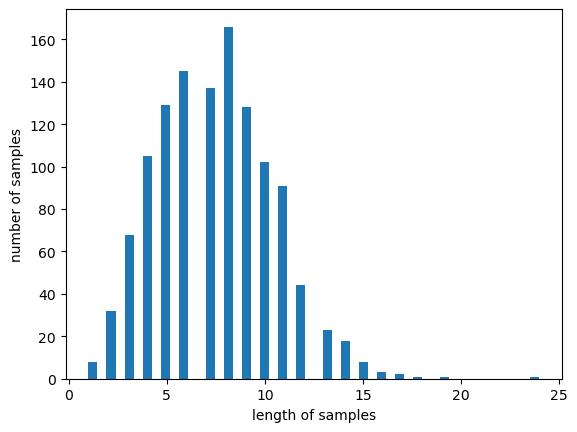

In [36]:
# 샘플(sequence)의 최대 길이 구하기
import matplotlib.pyplot as plt
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

print('메일의 최대 길이 : %d' % max(len(l) for l in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(s) for s in X_train_encoded], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [38]:
# 시퀀스 패딩
# 메일의 최대 길이가 그리 크지 않기 때문에, 최대길이 사용하여 padding
import numpy as np 
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
maxlen = len([x for x in X_train_encoded])
X_train_encoded = sequence.pad_sequences(X_train_encoded, maxlen=maxlen)
# y_train_encoded = np.expand_dims(np.where(y_train=='spam',1,0),-1)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 예시 텍스트 데이터
text = """This is a simple example of text generation using RNN. 
          Recurrent Neural Networks can learn from sequences of text and generate new sequences."""

# 텍스트 토크나이저를 사용해 시퀀스 생성
tokenizer = Tokenizer(char_level=True)  # 문자 단위 토크나이저
tokenizer.fit_on_texts([text])
total_characters = len(tokenizer.word_index) + 1  # 문자 총 개수

# 텍스트를 정수 인코딩
encoded_text = tokenizer.texts_to_sequences([text])[0]

# 시퀀스를 일정 길이로 분할하여 입력과 출력 데이터 생성
sequence_length = 10  # 예시로 시퀀스 길이 10 설정
sequences = []
for i in range(sequence_length, len(encoded_text)):
    seq = encoded_text[i-sequence_length:i]
    label = encoded_text[i]
    sequences.append((seq, label))

# 입력(X)과 출력(y) 분리
sequences = np.array(sequences)
X, y = sequences[:, :-1], sequences[:, -1]

# 원-핫 인코딩으로 출력 데이터를 변환
y = tf.keras.utils.to_categorical(y, num_classes=total_characters)

# 패딩된 입력 시퀀스
X = pad_sequences(X, maxlen=sequence_length-1)


In [63]:
# 시퀀스 넘파이 배열로 변환


# 마지막 단어를 제외한 부분을 입력 데이터로 사용


# 마지막 단어를 출력 데이터로 사용



In [ ]:
# data(X) 3행 출력

In [ ]:
# target(y) 3행 출력

In [66]:
# target(y)에 대해 원 핫 인코딩


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [ ]:
# 모델 생성

# 모델 컴파일

In [ ]:
# 모델 학습

In [69]:
# 문장 생성기(RNN과 완전 동일)
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복하면서 단어를 계속 추가
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [116]:
print(sentence_generation(model, tokenizer, 'i want', 12))

i want to be rich and im not sorry back to not attack raising


In [112]:
print(sentence_generation(model, tokenizer, 'how', 5))

how to make a crossword puzzle
